In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (225, 225, 3)


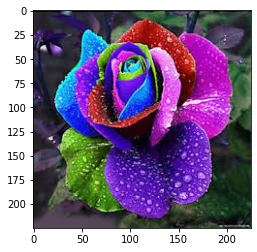

In [56]:
#Opencv to read image
image_main ='object.jpg'
image = cv2.imread(image_main)
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

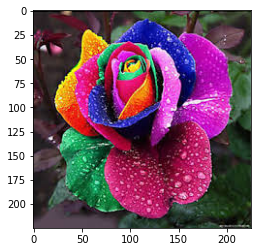

In [57]:
#image is converted into Blue Green Red (BGR) to Red Green Blue (RGB)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

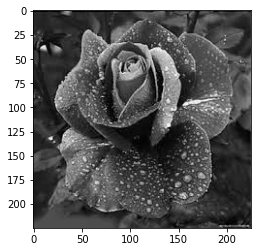

In [58]:
#image is converted into Blue Green Red (BGR) to Gray
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

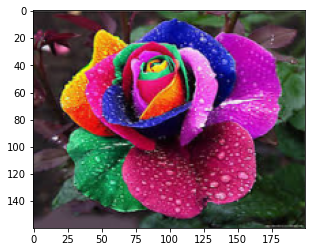

In [59]:
resized_image = cv2.resize(image, (200, 160))
plt.imshow(resized_image)

In [60]:
#function to covert RGB to Hex decimal
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [61]:
#function to get image from source
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [62]:
#this function give chart of color ,number of color from image 
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (200, 160), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([ 45.24302542,  46.23744575, 173.34531928]),
 array([41.54615519, 34.73121387, 33.7144859 ]),
 array([176.47349655,  26.21583076,  75.66127882]),
 array([ 63.13075171, 159.47243736, 111.28200456]),
 array([224.42412451, 121.89271818, 215.82379099]),
 array([74.53239289, 80.52629746, 73.21891327]),
 array([232.27819549, 157.34586466,  33.10609858]),
 array([201.01070776,  40.31862105, 165.25541917])]

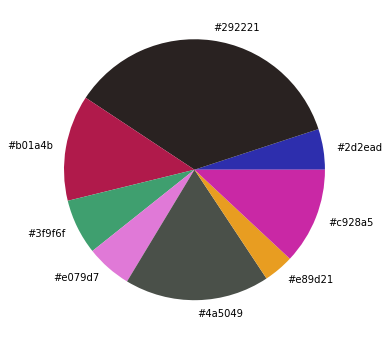

In [63]:

get_colors(get_image(image_main), 8, True)

In [64]:
#import image from os
IMAGE_DIRECTORY = 'image'
COLORS = {
    'GREEN': [0, 125, 0],
    'BLUE': [0,0,125],
    'YELLOW':[255,255,0],
    'RED':[255,0,0],
    'LIGHT BLUE':[0,255,255],
    
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

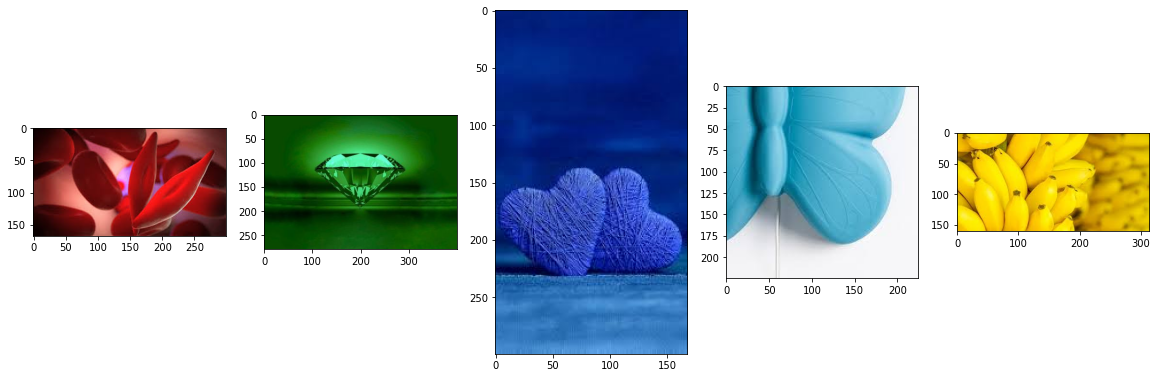

In [65]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [66]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [67]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

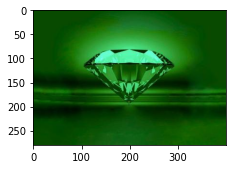

In [68]:
#this gives us a result of green images
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

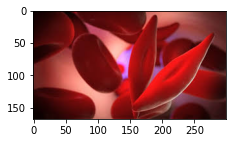

In [69]:
#this gives us a result of red images
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['RED'], 60, 5)

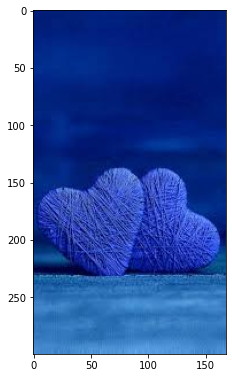

In [70]:
#this gives us a result of blue images
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

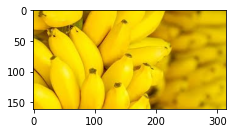

In [71]:
#this gives us a result of yellow images
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

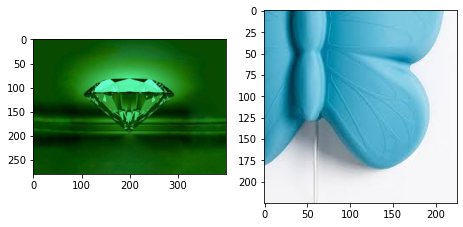

In [72]:
#this gives us a result of light blue images
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['LIGHT BLUE'], 60, 5)